<a href="https://colab.research.google.com/github/AnjosLu/RecipeScaleConverter_NotionWidget/blob/main/FacialRecognitionAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=2446ec227944450d536e33ac4cea97d100d93546ca8991a68e6be3081869a316
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
24-01-08 14:08:17 - Directory /root/.deepface created
24-01-08 14:08:17 - Directory /root/.deepface/weights created
24-01-08 14:08:23 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:07<00:00, 77.0MB/s]


The face has been recognized as the predefined person.


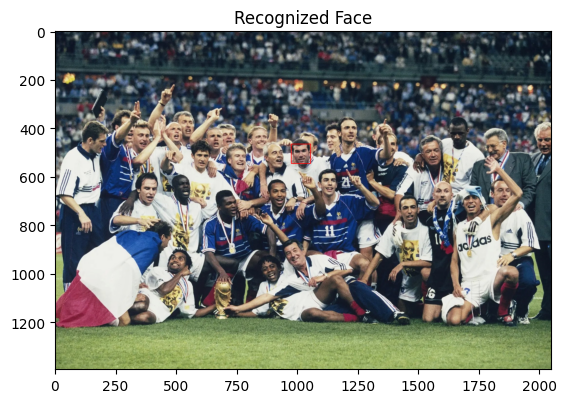

Chosen face not found in the bigger picture.
Chosen face not found in the bigger picture.
Chosen face not found in the bigger picture.
Chosen face not found in the bigger picture.
Chosen face not found in the bigger picture.


In [ ]:
# Importation des librairies python utiles (et installation de deepface)
# -> juste éxecuter cette cellule avant de commencer !
!pip install deepface
!pip install retina-face

# Import necessary libraries
from deepface import DeepFace
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import os
import shutil
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import cv2

# Load the chosen face image
chosen_face_image = cv2.imread("zidane_98.jpg")

# Load the bigger picture
bigger_picture = cv2.imread("equipe_fr_98.jpg")

#Use DeepFace to recognise the faces
result = DeepFace.verify("equipe_fr_98.jpg", "zidane_98.jpg")

if result["verified"]:
    print("The face has been recognized as the predefined person.")

    # Use OpenCV to detect the face
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(bigger_picture, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.20, minNeighbors=30, minSize=(15, 15))

    # Draw a red rectangle around the detected face
    for (x, y, w, h) in faces:
        # Crop the face region
        face_roi = bigger_picture[y:y + h, x:x + w]

        # Use DeepFace to recognize the face in the cropped region
        verification_result = DeepFace.verify(face_roi, "zidane_98.jpg", enforce_detection=False)

        if verification_result["verified"]:
            # Draw a red rectangle around the recognized face
            cv2.rectangle(bigger_picture, (x, y), (x + w, y + h), (0, 0, 255), 2)

            # Display the image with the recognized face
            plt.imshow(cv2.cvtColor(bigger_picture, cv2.COLOR_BGR2RGB))
            plt.title("Recognized Face")
            plt.show()
        else:
            print("Chosen face not found in the bigger picture.")